# The Best of the Best Models

## Imports

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [24]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

## Intro to ACF and PACF

### AR or MA

In [3]:
df = pd.read_csv('df.csv', parse_dates=['date'], index_col='date')

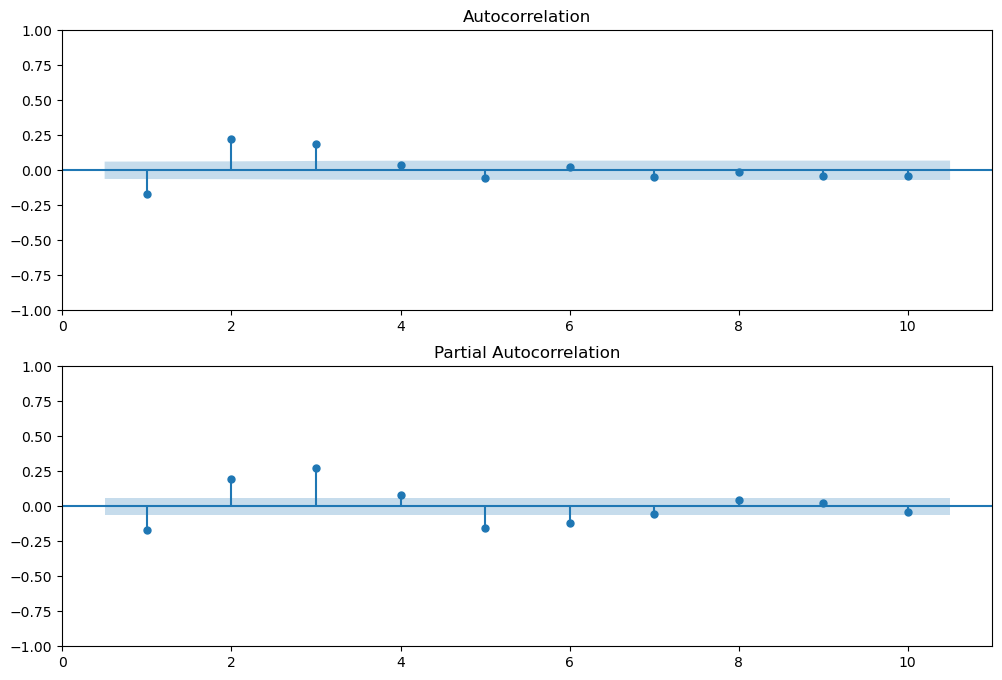

In [4]:
# Import
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of df
plot_acf(df, lags=10, zero=False, ax=ax1)

# Plot the PACF of df
plot_pacf(df, lags=10, zero=False, ax=ax2)

plt.show()

### Order of earthquakes

In [7]:
earthquake = pd.read_csv('earthquakes.csv', parse_dates=['date'], index_col='date')[['earthquakes_per_year']]

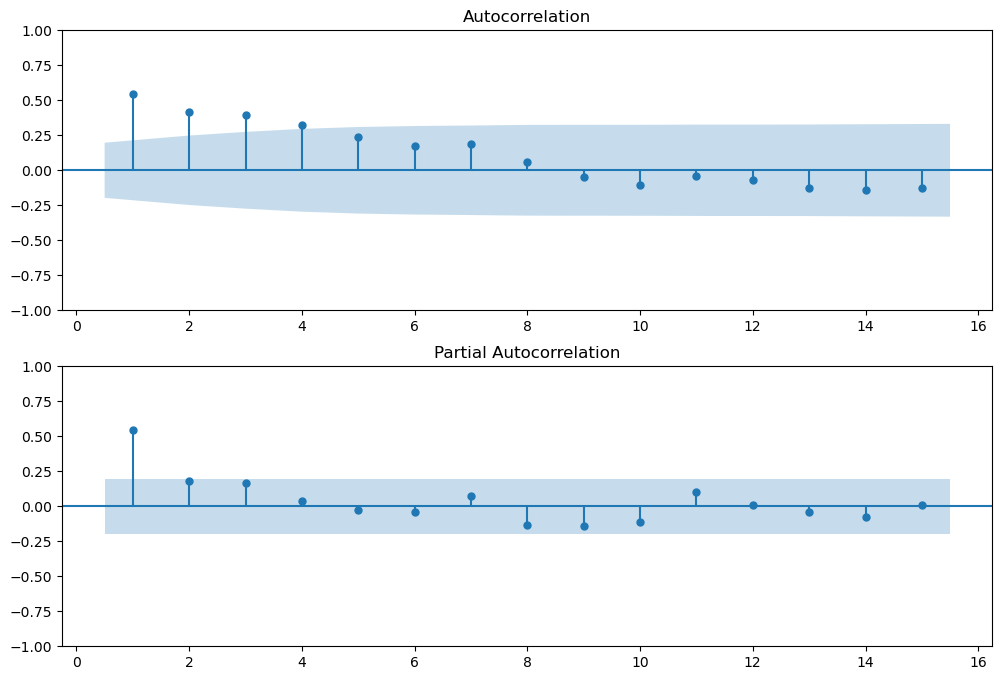

In [10]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot ACF and PACF
plot_acf(earthquake, lags=15, zero=False, ax=ax1)
plot_pacf(earthquake, lags=15, zero=False, ax=ax2)

# Show plot
plt.show()

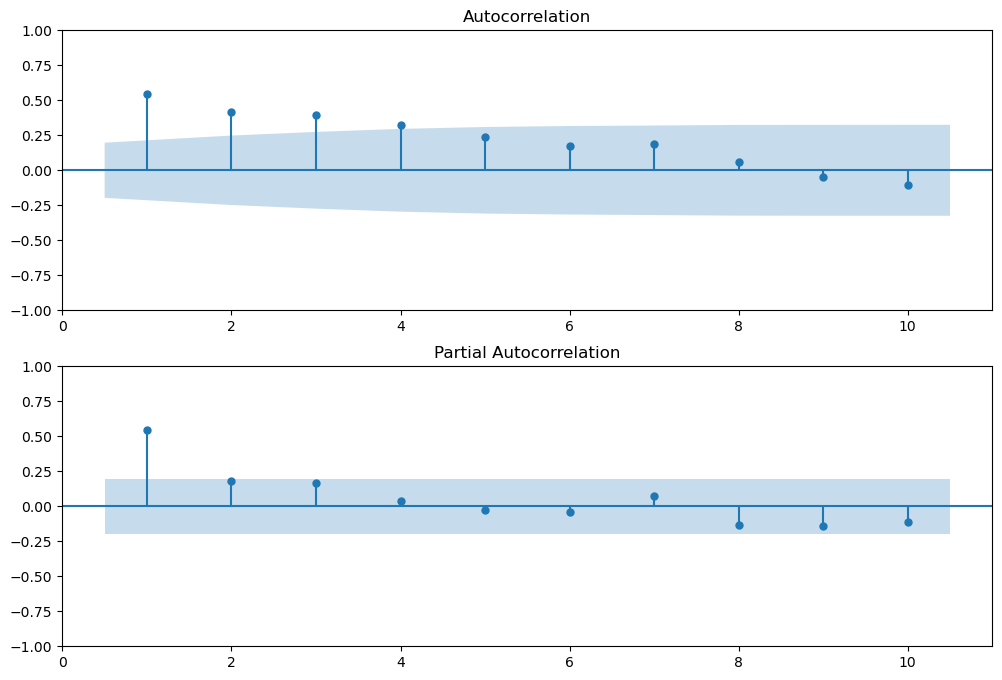

/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


In [12]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot ACF and PACF
plot_acf(earthquake, lags=10, zero=False, ax=ax1)
plot_pacf(earthquake, lags=10, zero=False, ax=ax2)

# Show plot
plt.show()

# Instantiate model
model = ARIMA(earthquake, order=(1,0,0))

# Train model
results = model.fit()

## Intro to AIC and BIC

### Searching over model order

In [13]:
# Create empty list to store search results
order_aic_bic=[]

# Loop over p values from 0-2
for p in range(3):
  # Loop over q values from 0-2
    for q in range(3):
      	# create and fit ARMA(p,q) model
        model = ARIMA(df, order=(p,0,q))
        results = model.fit()
        
        # Append order and results tuple
        order_aic_bic.append((p, q, results.aic, results.bic))

/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: Val

### Choosing order with AIC and BIC

In [14]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

   p  q          AIC          BIC
8  2  2  2808.550867  2837.997398
5  1  2  2817.883179  2842.421955
2  0  2  2871.714967  2891.345988
7  2  1  2890.217194  2914.755971
6  2  0  2929.942696  2949.573717
4  1  1  2958.980610  2978.611631
3  1  0  2967.689233  2982.412499
1  0  1  2977.454992  2992.178258
0  0  0  2996.009947  3005.825458
   p  q          AIC          BIC
8  2  2  2808.550867  2837.997398
5  1  2  2817.883179  2842.421955
2  0  2  2871.714967  2891.345988
7  2  1  2890.217194  2914.755971
6  2  0  2929.942696  2949.573717
4  1  1  2958.980610  2978.611631
3  1  0  2967.689233  2982.412499
1  0  1  2977.454992  2992.178258
0  0  0  2996.009947  3005.825458


### AIC and BIC vs ACF and PACF

In [15]:
# Loop over p values from 0-2
for p in range(3):
    # Loop over q values from 0-2
    for q in range(3):
      
        try:
            # create and fit ARMA(p,q) model
            model = ARIMA(earthquake, order=(p,0,q))
            results = model.fit()
            
            # Print order and results
            print(p, q, results.aic, results.bic)
            
        except:
            print(p, q, None, None)     

/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


0 0 676.5443594984657 681.7345991987349
0 1 654.8468586200236 662.6322181704273
0 2 651.7332270518965 662.1137064524348
1 0 643.9676770992036 651.7530366496073


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


1 1 640.4562835911977 650.836762991736
1 2 642.3808673565687 655.3564666072417
2 0 642.7338539384174 653.1143333389557


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2 1 647.4406643448115 660.4162635954845
2 2 642.4685896287066 658.0393087295141


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


## Model diagnostics

### Mean absolute error

/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


4.568988294622286


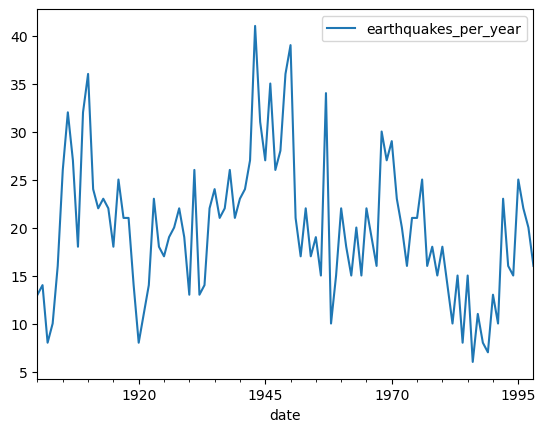

In [18]:
# Fit model
model = ARIMA(earthquake, order=(1,0,1))
results = model.fit()

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(results.resid))

# Print mean absolute error
print(mae)

# Make plot of time series for comparison
earthquake.plot(label='data', legend=True)
plt.show()

### Diagnostic summary statistics

In [19]:
# Create and fit model
model1 = ARIMA(df, order=(3,0,1))
results1 = model1.fit()

# Print summary
print(results1.summary())

/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(3, 0, 1)   Log Likelihood               -1421.068
Date:                Sat, 20 Sep 2025   AIC                           2854.135
Time:                        20:36:17   BIC                           2883.582
Sample:                    01-01-2013   HQIC                          2865.327
                         - 09-27-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0535      0.049      1.102      0.271      -0.042       0.149
ar.L1         -0.0755      0.111     -0.680      0.497      -0.293       0.142
ar.L2          0.2520      0.034      7.440      0.0

In [20]:
# Create and fit model
model2 = ARIMA(df, order=(2,0,0))
results2 = model2.fit()

# Print summary
print(results2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1460.971
Date:                Sat, 20 Sep 2025   AIC                           2929.943
Time:                        20:38:36   BIC                           2949.574
Sample:                    01-01-2013   HQIC                          2937.404
                         - 09-27-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0540      0.035      1.532      0.125      -0.015       0.123
ar.L1         -0.1389      0.031     -4.491      0.000      -0.200      -0.078
ar.L2          0.1976      0.031      6.277      0.0

/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


### Plot diagnostics

/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


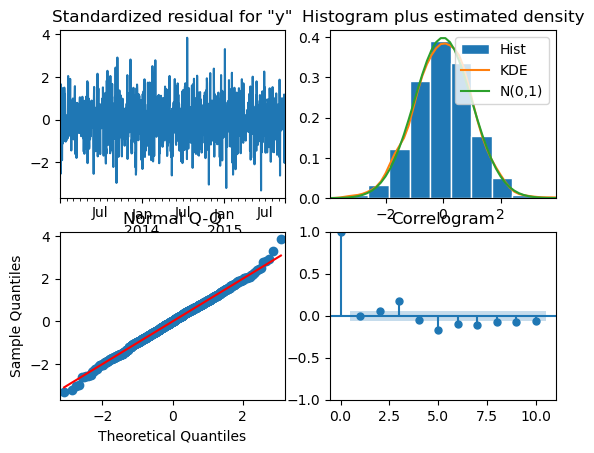

In [21]:
# Create and fit model
model = ARIMA(df, order=(1,1,1))
results = model.fit()

# Create the 4 diagnostics plots
results.plot_diagnostics()
plt.show()

## Box-Jenkins method

### Identification

In [22]:
savings = pd.read_csv('savings.csv', parse_dates=['date'], index_col='date')

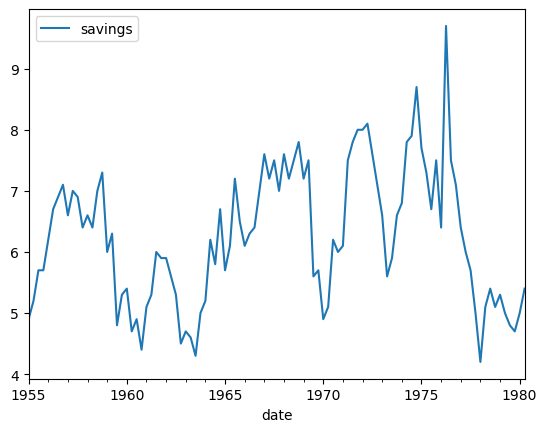

(-3.1858990962421396, 0.02081554164411418, 2, 99, {'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}, 188.16866622396867)
0.02081554164411418


In [29]:
# Plot time series
savings.plot()
plt.show()

# Run Dicky-Fuller test
result = adfuller(savings)

# Print test statistic
print(result)

# Print p-value
print(result[1])

### Identification II

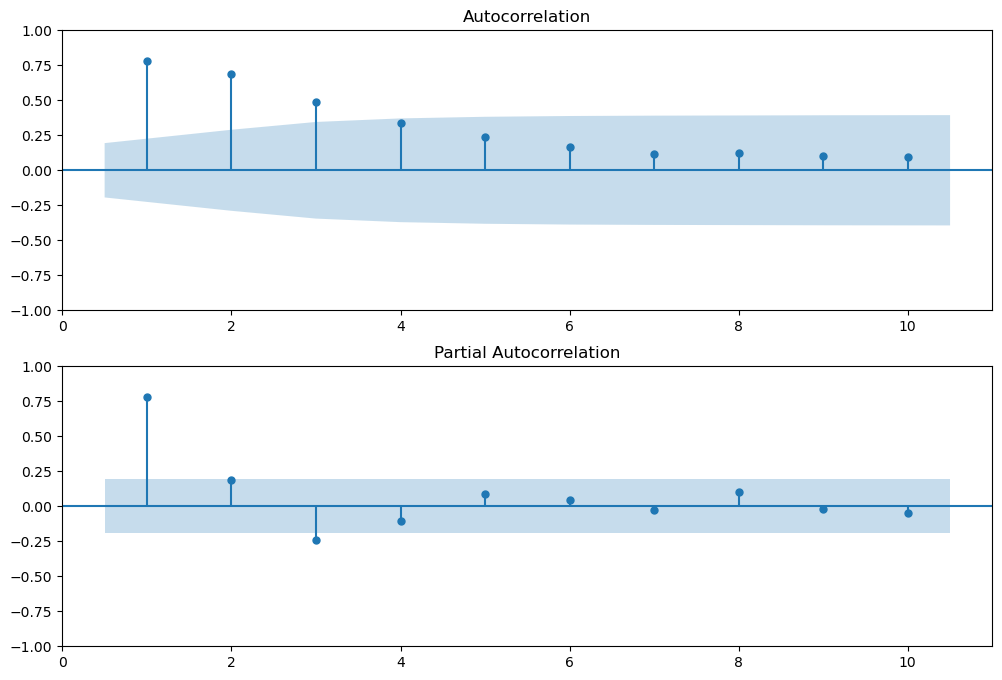

In [30]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of savings on ax1
plot_acf(savings, lags=10, zero=False, ax=ax1)

# Plot the PACF of savings on ax2
plot_pacf(savings, lags=10, zero=False, ax=ax2)

plt.show()

### Estimation

In [32]:
# Loop over p values from 0-3
for p in range(4):
  
  # Loop over q values from 0-3
    for q in range(4):
      try:
        # Create and fit ARMA(p,q) model
        model = ARIMA(savings, order=(p, 0, q))
        results = model.fit()
        
        # Print p, q, AIC, BIC
        print(p, q, results.aic, results.bic)
        
      except:
        print(p, q, None, None)

/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


0 0 313.6028657381061 318.85281136467466
0 1 267.069709808447 274.9446282482998
0 2 232.167826773638 242.6677180267751
0 3 217.59720509753367 230.72206916395504
1 0 216.2034795637731 224.07839800362592
1 1 215.70038895291657 226.20028020605366


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


1 2 207.65298384447576 220.7778479108971
1 3 209.57498315813882 225.32482003784446
2 0 213.97232199692377 224.47221325006086


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/israel/miniconda3/envs/ds2/lib/python

2 1 213.43035867875673 226.55522274517807
2 2 209.57903144324024 225.32886832294588


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2 3 211.5749819478379 229.94979164082778
3 0 209.54492936717335 222.6697934335947
3 1 210.82147284903022 226.57130972873586


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


3 2 211.45759548497983 229.83240517796972


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


3 3 213.3565085757386 234.35629108201275


### Diagnostics

/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


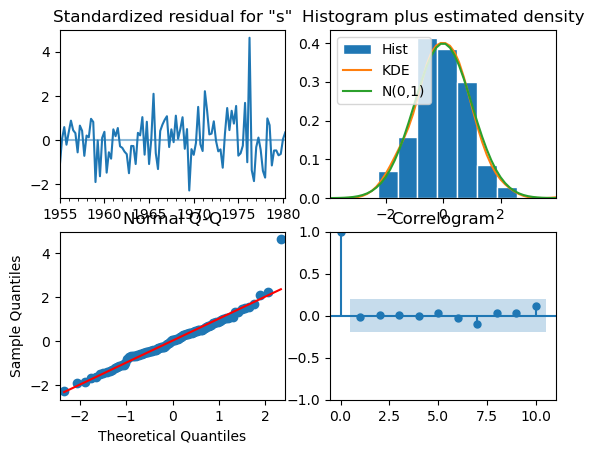

                               SARIMAX Results                                
Dep. Variable:                savings   No. Observations:                  102
Model:                 ARIMA(1, 0, 2)   Log Likelihood                 -98.826
Date:                Sun, 21 Sep 2025   AIC                            207.653
Time:                        17:10:15   BIC                            220.778
Sample:                    01-01-1955   HQIC                           212.968
                         - 04-01-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1949      0.323     19.169      0.000       5.561       6.828
ar.L1          0.7284      0.111      6.534      0.000       0.510       0.947
ma.L1         -0.0538      0.145     -0.370      0.7

In [35]:
# Create and fit model
model = ARIMA(savings, order=(1,0,2))
results = model.fit()

# Create the 4 diagostics plots
results.plot_diagnostics()
plt.show()

# Print summary
print(results.summary())